In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('cars.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [3]:
df.shape

(205, 15)

In [4]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [7]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [8]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [11]:
df['normalized-losses'].replace('?',np.nan , inplace=True)

In [13]:
df['horsepower'].replace('?',np.nan , inplace=True)

In [14]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [18]:
df['normalized-losses'] = df['normalized-losses'].astype(float)
df['make'] = df['make'].astype(str)
df['fuel-type'] = df['fuel-type'].astype(str)
df['horsepower'] = df['horsepower'].astype(float)

In [20]:
df['normalized-losses'].fillna(df['normalized-losses'].mean() , inplace=True)
df['horsepower'].fillna(df['horsepower'].mean() , inplace=True)

In [21]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [23]:
df['normalized-losses'] = df['normalized-losses'].astype(int)
df['horsepower'] = df['horsepower'].astype(int)

In [25]:
df.describe()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,65.907805,53.724878,126.907317,104.253659,25.219512,30.751220,13227.478049
std,1.245307,31.681008,2.145204,2.443522,41.642693,39.519219,6.542142,6.886443,7902.651615
min,-2.000000,65.000000,60.300000,47.800000,61.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,64.100000,52.000000,97.000000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,65.500000,54.100000,120.000000,95.000000,24.000000,30.000000,10345.000000
75%,2.000000,137.000000,66.900000,55.500000,141.000000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,72.300000,59.800000,326.000000,288.000000,49.000000,54.000000,45400.000000


In [31]:
import matplotlib.pyplot as plt
import seaborn as sn

<AxesSubplot:xlabel='make', ylabel='price'>

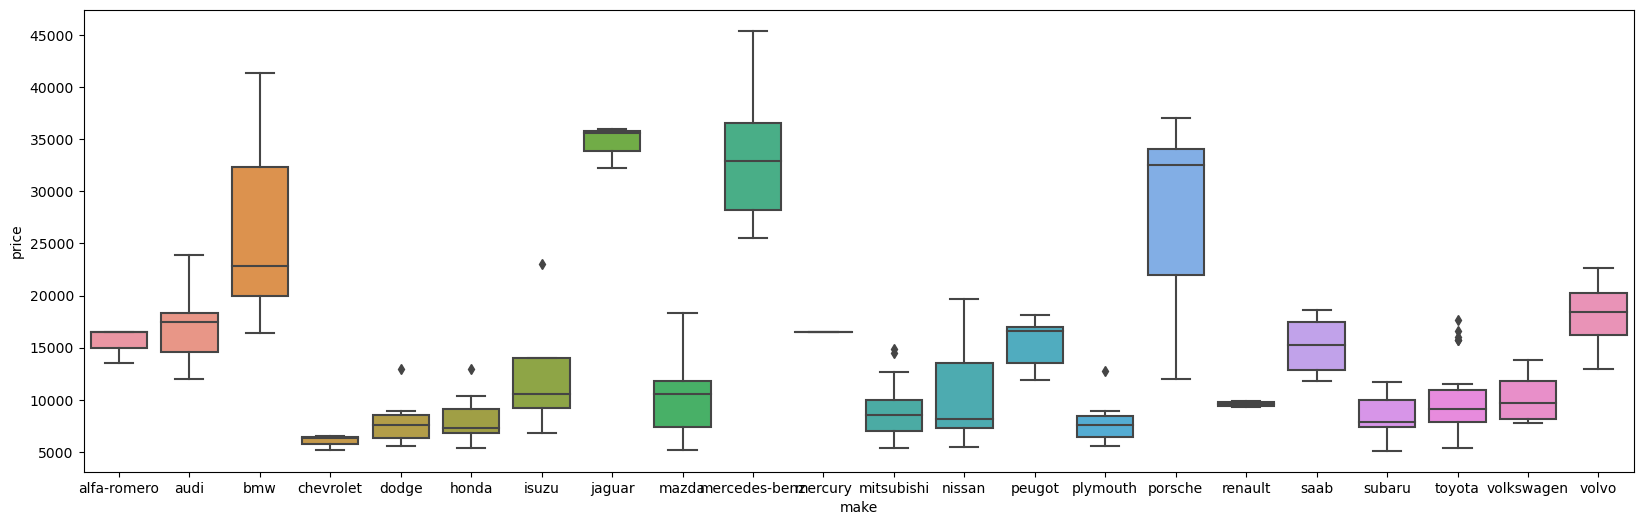

In [34]:
plt.figure(figsize=(20,6))
sn.boxplot(data = df ,x='make', y = 'price')

In [40]:
# Removing Outliers - 29 
df[(df['make'] == 'dodge') & (df['price'] > 10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,12964


In [41]:
df[(df['make'] == 'honda') & (df['price'] > 10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
40,0,85,honda,gas,sedan,fwd,front,62.5,54.1,ohc,110,86,27,33,10295
41,0,85,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101,24,28,12945
42,1,107,honda,gas,sedan,fwd,front,66.0,51.0,ohc,110,100,25,31,10345


In [42]:
df[(df['make'] == 'isuzu') & (df['price'] > 15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70,38,43,23000


In [47]:
df[(df['make'] == 'mitsubishi') & (df['price'] > 14800)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,14869


In [49]:
df[(df['make'] == 'plymouth') & (df['price'] > 12760)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145,19,24,12764


In [53]:
df[(df['make'] == 'toyota') & (df['price'] > 12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116,24,30,17669
178,3,197,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161,20,24,16558
179,3,197,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161,19,24,15998
180,-1,90,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156,20,24,15690
181,-1,122,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156,19,24,15750


In [54]:
df.drop([172,178,179,180,181,124,83,45,40,41,42,29] , inplace=True)

<AxesSubplot:xlabel='make', ylabel='price'>

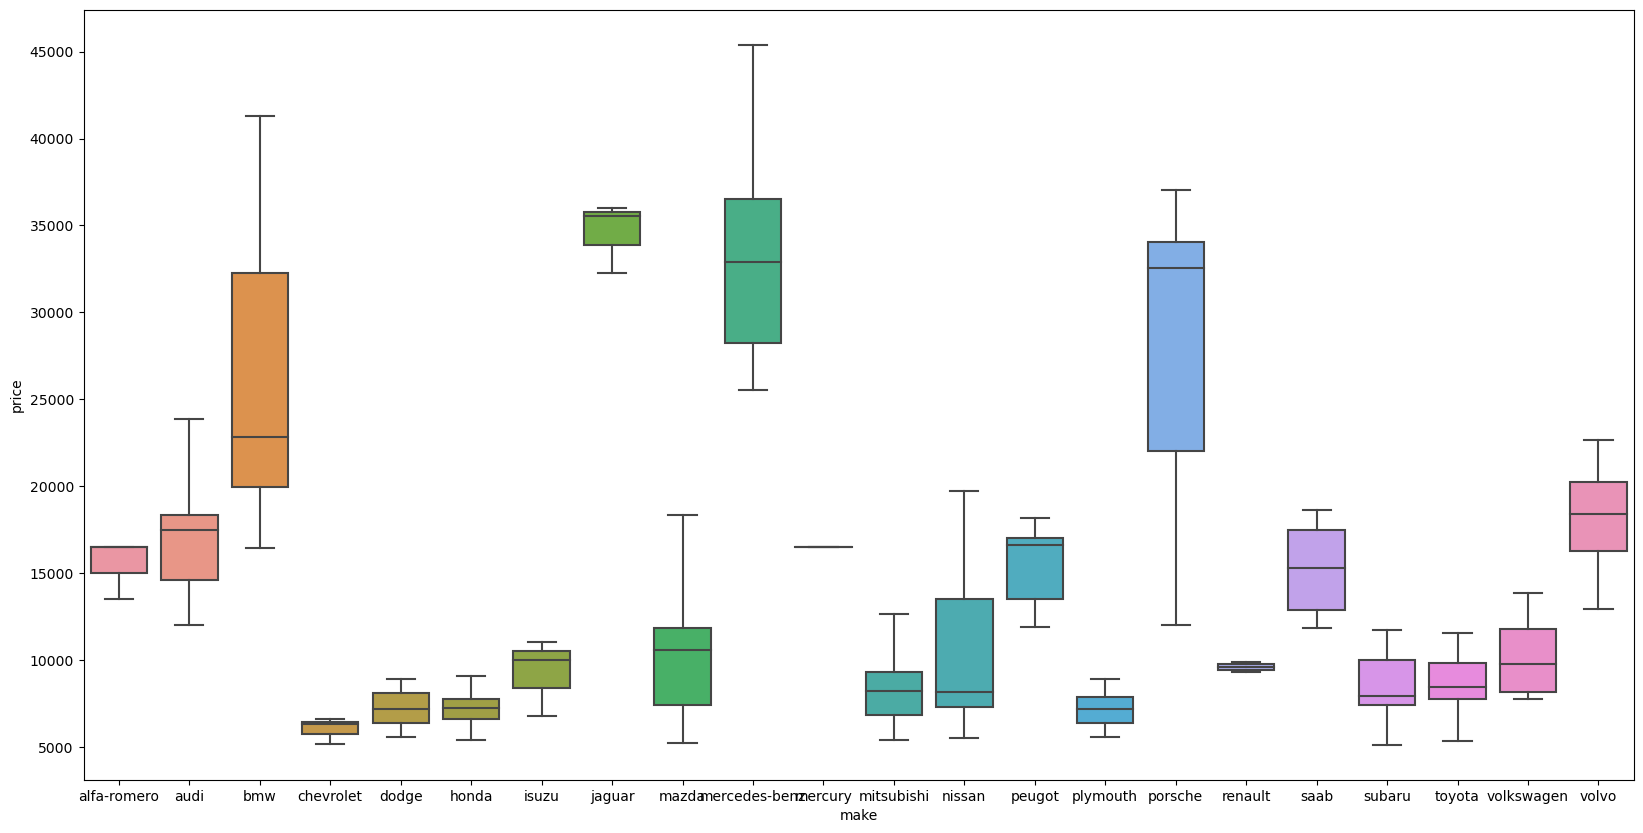

In [58]:
plt.figure(figsize=(20,10))
sn.boxplot(data = df ,x='make', y = 'price')

In [56]:
df[(df['make'] == 'mitsubishi') & (df['price'] > 14000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
84,3,122,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,14489


In [57]:
df.drop(84,inplace=True)

In [59]:
df.shape

(192, 15)

In [60]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [61]:
categorical_data = df[['make','fuel-type','body-style','drive-wheels','engine-location','engine-type']]

In [62]:
categorical_data

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc
...,...,...,...,...,...,...
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc


In [63]:
dfc = categorical_data

In [69]:
l1 = list(dfc.columns)
l1

['make',
 'fuel-type',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type']

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [71]:
dfc[l1] = dfc[l1].apply(le.fit_transform)

C:\Users\HP\AppData\Local\Temp\ipykernel_9984\3085531757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[l1] = dfc[l1].apply(le.fit_transform)


In [72]:
dfc

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [75]:
df.drop(columns=l1 , inplace=True)

In [76]:
df

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122,64.1,48.8,130,111,21,27,13495
1,3,122,64.1,48.8,130,111,21,27,16500
2,1,122,65.5,52.4,152,154,19,26,16500
3,2,164,66.2,54.3,109,102,24,30,13950
4,2,164,66.4,54.3,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95,68.9,55.5,141,114,23,28,16845
201,-1,95,68.8,55.5,141,160,19,25,19045
202,-1,95,68.9,55.5,173,134,18,23,21485
203,-1,95,68.9,55.5,145,106,26,27,22470


In [78]:
df[l1] = dfc[l1]

In [79]:
df

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,122,64.1,48.8,130,111,21,27,13495,0,1,0,2,0,0
1,3,122,64.1,48.8,130,111,21,27,16500,0,1,0,2,0,0
2,1,122,65.5,52.4,152,154,19,26,16500,0,1,2,2,0,5
3,2,164,66.2,54.3,109,102,24,30,13950,1,1,3,1,0,3
4,2,164,66.4,54.3,136,115,18,22,17450,1,1,3,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,68.9,55.5,141,114,23,28,16845,21,1,3,2,0,3
201,-1,95,68.8,55.5,141,160,19,25,19045,21,1,3,2,0,3
202,-1,95,68.9,55.5,173,134,18,23,21485,21,1,3,2,0,5
203,-1,95,68.9,55.5,145,106,26,27,22470,21,0,3,2,0,3


In [80]:
df.to_csv('cleaned_cars.csv' , index=False)